In [80]:
import pandas as pd
import matplotlib.pyplot as plt


In [81]:
df=pd.read_csv("./data/placement.csv")

In [82]:
df.head()
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [83]:
df.info()#no missing values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [84]:
df=df.iloc[:,1:]# we do not need 1st columns so remove it 
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


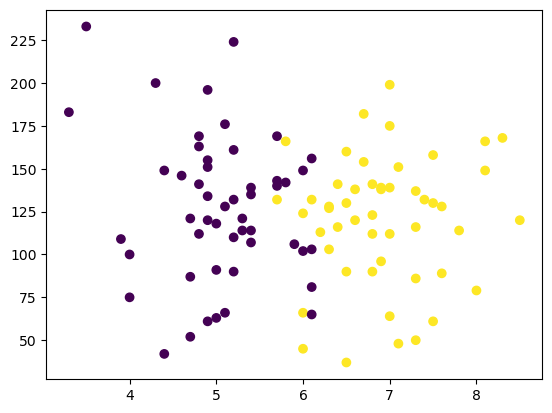

In [85]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])# points are colored based on the 'placement' values.

In [86]:
X=df.iloc[:,0:2]
X# x is 2d tensor
# iloc[:, 0:2] selects all rows (:) and columns from index 0 up to 1, but not including, index 2.
# Column indices start from 0. So 0:2 includes columns at index 0 and 1, but not index 2.

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [87]:
y=df.iloc[:,2]
# y=y.to_frame()#convert the returned series into data frame
#y is 1D tensor


In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)#understand the data and then transform so we first fit then transform

In [91]:
X_test=scaler.transform(X_test)#already understand the data so no need to fit

In [92]:
from sklearn.linear_model import LogisticRegression


In [93]:
clf=LogisticRegression()

In [94]:
clf.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred=clf.predict(X_test)

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test,y_pred)

0.8

In [98]:
# now we want to see the boundary used by logistic regression so
from mlxtend.plotting import plot_decision_regions


<Axes: >

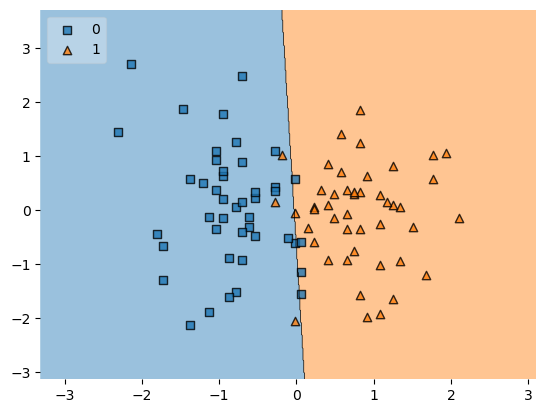

In [100]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)


In [102]:
import pickle

In [103]:
pickle.dump(clf,open('model.pkl','wb'))